## Imports

In [30]:
# utils
import os
import sys
from pathlib import Path

PROJECT_DIR = Path.cwd().parent
sys.path.append(str(PROJECT_DIR))

# viz
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
# basics
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

# metrics
from utils import config
from utils.reader import read_file_yaml
from utils.utils import get_last_modification_directory

np.random.seed(0)

## Parameters

In [31]:
path_conf = PROJECT_DIR / "conf"
file_path_parameters = path_conf / "parameters.yml"
path_outputs = PROJECT_DIR / "outputs"
params = read_file_yaml(file_path_parameters)
path_root = PROJECT_DIR / params["results"]["filepath"]

if not os.path.exists(path_outputs):
    os.makedirs(path_outputs)

file_path_random_abilities = path_outputs / "random_partitions_ability{}"

n_random = np.sort(
    [int(i.replace("random_n", "")) for i in os.listdir(path_root) if ".placehold" not in i]
)
path_random = ["random_n" + str(i) for i in n_random]
path_results = [path_root / i for i in path_random]
path_results, path_random = get_last_modification_directory(path_results, path_random, params)

ext_type = params["outputs"]["extension_type"]
ext_local_img = params["outputs"]["extension_local_img"]
ext_best_img = params["outputs"]["extension_best_img"]

In [32]:
under_line = "\n{}\n"
title_part_n2 = "PROJECT_DIR: [ {} ]".format(PROJECT_DIR)
title_part_n3 = under_line.format("".join(["-"] * len(title_part_n2)))
title_part_n1 = under_line.format("".join(["-"] * len(title_part_n2)))
print(title_part_n1 + title_part_n2 + title_part_n3)


-------------------------------------------------------------
PROJECT_DIR: [ /home/manuel/projects/aaai-claire-clustering ]
-------------------------------------------------------------



## Read

In [33]:
parameters = read_file_yaml(file_path_parameters)

In [34]:
init = 1
metrics = {}
for name, url in zip(path_random, path_results):
    metrics[name] = {}
    for dataset in config.file_names:
        metrics[name][dataset] = pd.read_csv(url / Path(dataset) / "metrics" / Path("metrics" + ext_type), index_col=0)

## Concat all results

In [35]:
result = {}
for i_random, i_content in metrics.items():
    result[i_random] = {}
    for i_name, i_metric in i_content.items():
        result[i_random][i_name] = i_metric["abilities"].filter(regex="random_n").mean()
data = pd.DataFrame(result)

In [36]:
new_columns = {col: f"$p_{{({i+1})}}$" for i, col in enumerate(data.columns)}
data.rename(columns=new_columns, inplace=True)

## Plot parameters

In [37]:
colors = plt.cm.coolwarm(np.linspace(0, 1, data.shape[0]))
markers = list(mlines.Line2D.markers.keys())

_params = {
    _dataset: {"color": colors[_idx], "marker": markers[_idx], "linestyle": "--"}
    for _idx, _dataset in enumerate(data.index)
}

## Plots

/tmp/ipykernel_2065166/357007355.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.columns, rotation=0)  # Set rotation to 0 for horizontal labels


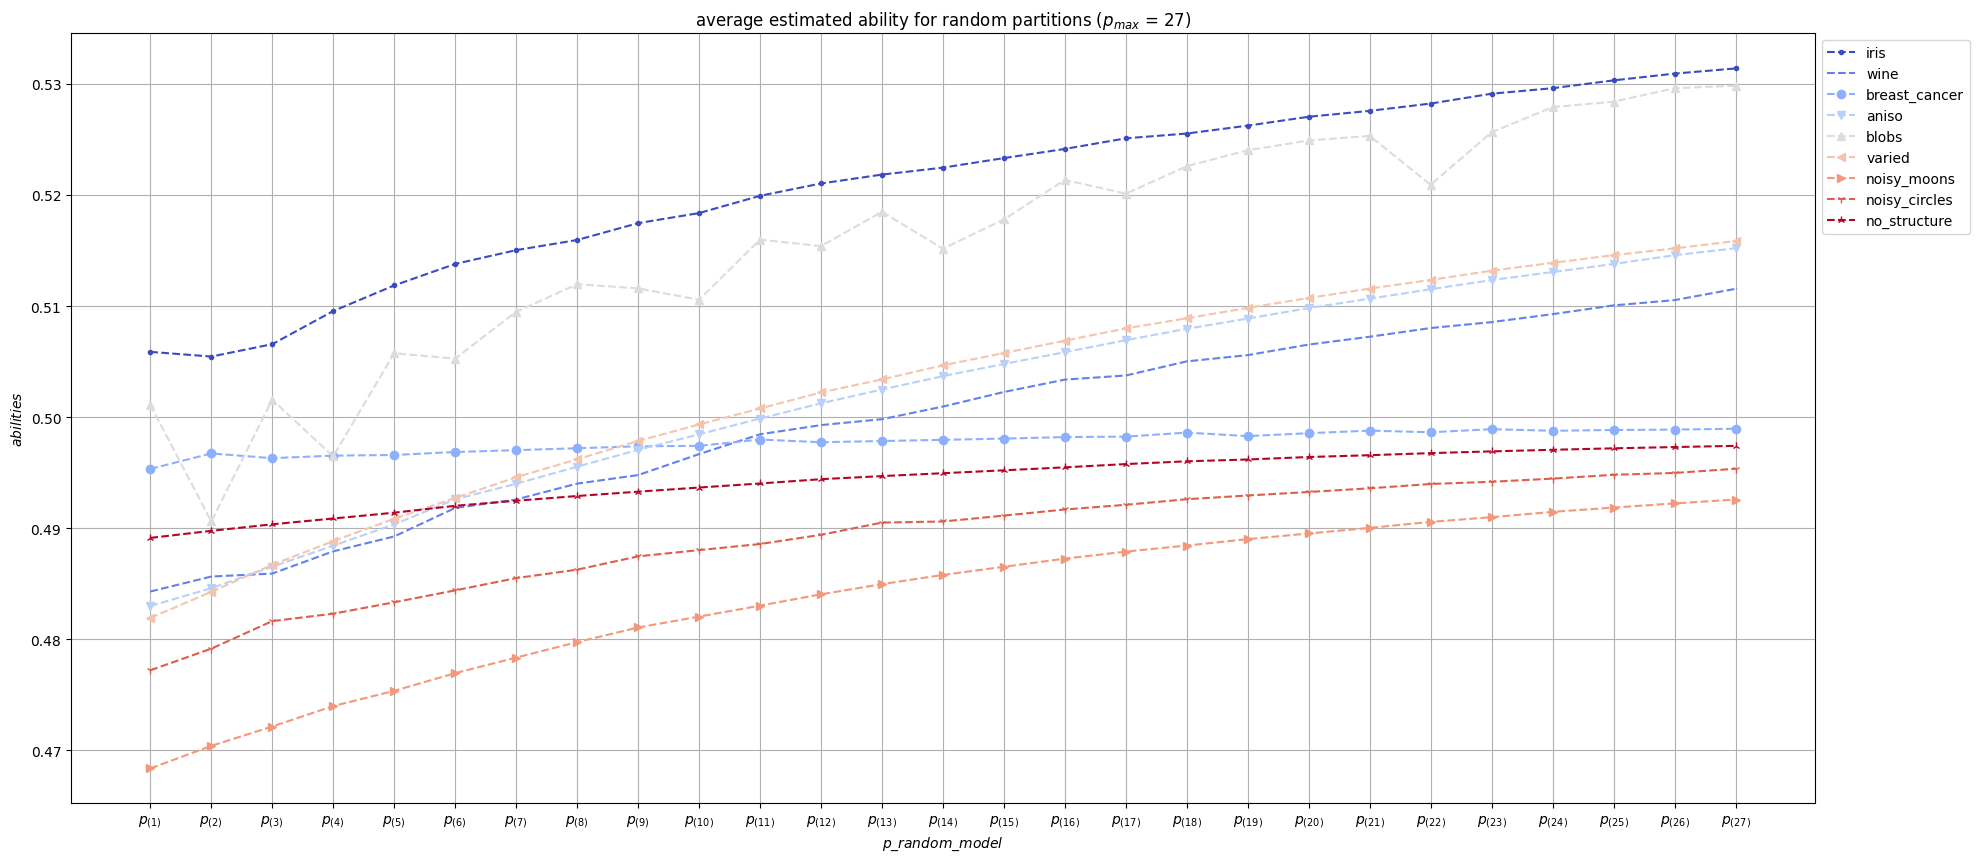

In [38]:
fig, ax = plt.subplots(1, 1, figsize=((20 / 8) * data.shape[0], 10))

for index, row in data.iterrows():
    param = _params[index]
    ax.plot(row, label=index, **param)

ax.legend()
ax.grid(True)
ax.set_title("average estimated ability for random partitions ($p_{max}$" + f" = {data.shape[1]})")
ax.set_xticklabels(data.columns, rotation=0)  # Set rotation to 0 for horizontal labels
ax.set_xlabel(r"$p\_random\_model$")
ax.set_ylabel("$abilities$")
handler_lines = [
    Line2D([], [], color=param["color"], linestyle=param["linestyle"], marker=param["marker"])
    for param in _params.values()
]
ax.legend(handler_lines, data.index, loc="upper left", bbox_to_anchor=(1.00, 1.0))
plt.show()

## Save

In [29]:
fig.savefig(str(file_path_random_abilities).format(ext_best_img))  # save best format
fig.savefig(str(file_path_random_abilities).format(ext_local_img))  # save local format

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
